# Human Activity Recognition

### Step 1: Download the dataset from link 

https://www.utwente.nl/en/eemcs/ps/dataset-folder/sensors-activity-recognition-dataset-shoaib.rar


In [ ]:
!pip install tensorflow-gpu==2.3.0
!pip install keras==2.4.3
!pip install numpy==1.19.5
!pip install matplotlib==3.3.3

In [1]:
import urllib.request

print('Downloading dataset')

url = 'https://www.utwente.nl/en/eemcs/ps/dataset-folder/sensors-activity-recognition-dataset-shoaib.rar'
urllib.request.urlretrieve(url, 'HAR_dataset.rar')

print('Download completed')

Download completed


### Step 2: Extract in the working directory


In [2]:
!pip3 install pyunpack
!pip3 install patool
from pyunpack import Archive
Archive('HAR_dataset.rar').extractall('.')

     |████████████████████████████████| 81kB 5.5MB/s 


### Step 3: Download Libraries


In [1]:
import tensorflow as tf
tf.__version__

'2.10.0'

In [2]:
# import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
path='dataset/DataSet/'
files=[file for file in os.listdir(path) if file.endswith('.csv')]
files

['Participant_8.csv',
 'Participant_9.csv',
 'Participant_10.csv',
 'Participant_7.csv',
 'Participant_6.csv',
 'Participant_4.csv',
 'Participant_5.csv',
 'Participant_1.csv',
 'Participant_2.csv',
 'Participant_3.csv']

In [5]:
# load a file into memory
df=pd.read_csv(path+files[0],header=1)
df.head()

,time_stamp,Ax,Ay,Az,Lx,Ly,Lz,Gx,Gy,Gz,...,Lx.4,Ly.4,Lz.4,Gx.4,Gy.4,Gz.4,Mx.4,My.4,Mz.4,Unnamed: 69
0,1.390000e+12,1.56630,-7.4640,2.50610,-0.72489,2.01760,1.4955,1.56560,-1.53020,-0.090713,...,-3.4679,1.539600,-1.89530,-0.33659,-0.156690,0.54978,24.00,2.82,-9.30,walking
1,1.390000e+12,2.23370,-8.0769,3.41870,-0.07754,1.36890,2.1517,1.13380,-0.37080,-0.376900,...,-1.6108,-0.030106,-1.74350,-0.35064,-0.753500,0.67317,24.00,3.06,-8.82,walking
2,1.390000e+12,0.19068,-10.3510,0.10896,-1.75790,-0.81255,-1.0668,1.18360,-0.66279,-0.554670,...,-1.9025,-0.636090,-0.79292,-0.55528,-0.365600,0.83169,24.12,3.06,-8.70,walking
3,1.390000e+12,-0.68102,-10.2290,-1.32120,-2.36530,-0.61226,-2.2454,1.20000,-1.45690,-0.396450,...,-2.5825,-0.733360,-1.61230,-0.82711,-0.079107,0.85399,24.30,3.00,-8.58,walking
4,1.390000e+12,-0.14982,-9.8884,-1.60720,-1.65250,-0.22073,-2.2773,0.93432,-0.97708,-0.450510,...,-4.9397,-2.614700,-0.98619,-1.66770,-0.839630,0.62217,24.60,3.12,-8.40,walking


In [6]:
df['Unnamed: 69'].unique()

array(['walking', 'standing', 'jogging', 'sitting', 'biking', 'upsatirs',
       'downstairs'], dtype=object)

## Visualize the difference in change in values w.r.t activity

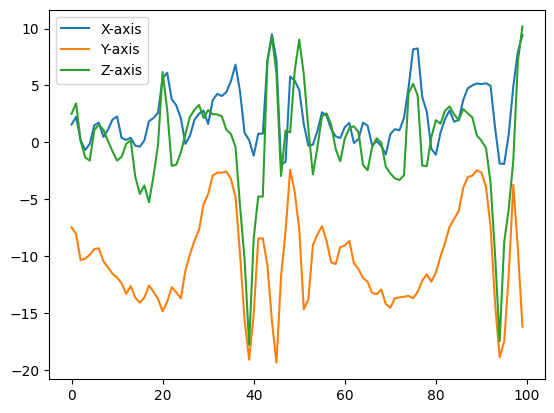

In [7]:
# change in values while walking

plt.plot(np.arange(0,100),df.Ax[df['Unnamed: 69']=="walking"][:100], label='X-axis')
plt.plot(np.arange(0,100),df.Ay[df['Unnamed: 69']=="walking"][:100], label='Y-axis')
plt.plot(np.arange(0,100),df.Az[df['Unnamed: 69']=="walking"][:100], label='Z-axis')
plt.legend()

/var/folders/hc/4_spfx051b5d36rrtssgcwl80000gn/T/ipykernel_79744/2446371698.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(np.arange(0,100),df.Ax[df['Unnamed: 69']=="standing"][:100], label='X-axis')
/var/folders/hc/4_spfx051b5d36rrtssgcwl80000gn/T/ipykernel_79744/2446371698.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(np.arange(0,100),df.Ay[df['Unnamed: 69']=="standing"][:100], label='Y-axis')
/var/folders/hc/4_spfx051b5d36rrtssgcwl80000gn/T/ipykern

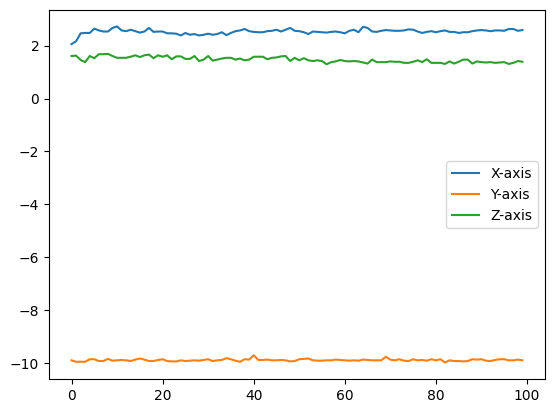

In [8]:
# change in values while standing

plt.plot(np.arange(0,100),df.Ax[df['Unnamed: 69']=="standing"][:100], label='X-axis')
plt.plot(np.arange(0,100),df.Ay[df['Unnamed: 69']=="standing"][:100], label='Y-axis')
plt.plot(np.arange(0,100),df.Az[df['Unnamed: 69']=="standing"][:100], label='Z-axis')
plt.legend()

/var/folders/hc/4_spfx051b5d36rrtssgcwl80000gn/T/ipykernel_79744/2867413791.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(np.arange(0,100),df.Ax[df['Unnamed: 69']=="biking"][:100], label='X-axis')
/var/folders/hc/4_spfx051b5d36rrtssgcwl80000gn/T/ipykernel_79744/2867413791.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(np.arange(0,100),df.Ay[df['Unnamed: 69']=="biking"][:100], label='Y-axis')
/var/folders/hc/4_spfx051b5d36rrtssgcwl80000gn/T/ipykernel_7

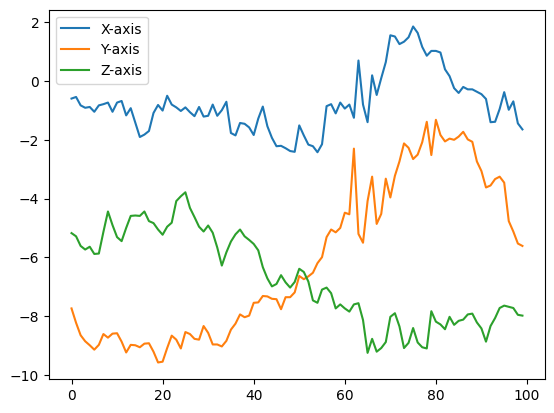

In [9]:
# change in values while biking

plt.plot(np.arange(0,100),df.Ax[df['Unnamed: 69']=="biking"][:100], label='X-axis')
plt.plot(np.arange(0,100),df.Ay[df['Unnamed: 69']=="biking"][:100], label='Y-axis')
plt.plot(np.arange(0,100),df.Az[df['Unnamed: 69']=="biking"][:100], label='Z-axis')
plt.legend()

/var/folders/hc/4_spfx051b5d36rrtssgcwl80000gn/T/ipykernel_79744/3628611996.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(np.arange(0,100),df.Ax[df['Unnamed: 69']=="jogging"][:100], label='X-axis')
/var/folders/hc/4_spfx051b5d36rrtssgcwl80000gn/T/ipykernel_79744/3628611996.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(np.arange(0,100),df.Ay[df['Unnamed: 69']=="jogging"][:100], label='Y-axis')
/var/folders/hc/4_spfx051b5d36rrtssgcwl80000gn/T/ipykernel

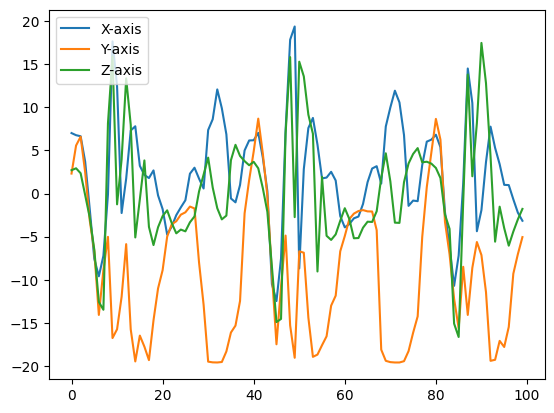

In [10]:
# change in values while jogging

plt.plot(np.arange(0,100),df.Ax[df['Unnamed: 69']=="jogging"][:100], label='X-axis')
plt.plot(np.arange(0,100),df.Ay[df['Unnamed: 69']=="jogging"][:100], label='Y-axis')
plt.plot(np.arange(0,100),df.Az[df['Unnamed: 69']=="jogging"][:100], label='Z-axis')
plt.legend()

## Load and concatenate all files into one dataframe

In [11]:
df=pd.DataFrame()

for file in files:
    df_temp=pd.read_csv(path+file,header=1)
    df=pd.concat([df,df_temp], sort=False)
df

,time_stamp,Ax,Ay,Az,Lx,Ly,Lz,Gx,Gy,Gz,...,Lx.4,Ly.4,Lz.4,Gx.4,Gy.4,Gz.4,Mx.4,My.4,Mz.4,Unnamed: 69
0,1.390000e+12,1.566300,-7.4640,2.50610,-0.724890,2.01760,1.4955,1.56560,-1.53020,-0.090713,...,-3.46790,1.539600,-1.89530,-0.33659,-0.156690,0.549780,24.00,2.82,-9.30,walking
1,1.390000e+12,2.233700,-8.0769,3.41870,-0.077540,1.36890,2.1517,1.13380,-0.37080,-0.376900,...,-1.61080,-0.030106,-1.74350,-0.35064,-0.753500,0.673170,24.00,3.06,-8.82,walking
2,1.390000e+12,0.190680,-10.3510,0.10896,-1.757900,-0.81255,-1.0668,1.18360,-0.66279,-0.554670,...,-1.90250,-0.636090,-0.79292,-0.55528,-0.365600,0.831690,24.12,3.06,-8.70,walking
3,1.390000e+12,-0.681020,-10.2290,-1.32120,-2.365300,-0.61226,-2.2454,1.20000,-1.45690,-0.396450,...,-2.58250,-0.733360,-1.61230,-0.82711,-0.079107,0.853990,24.30,3.00,-8.58,walking
4,1.390000e+12,-0.149820,-9.8884,-1.60720,-1.652500,-0.22073,-2.2773,0.93432,-0.97708,-0.450510,...,-4.93970,-2.614700,-0.98619,-1.66770,-0.839630,0.622170,24.60,3.12,-8.40,walking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62995,1.390000e+12,4.916900,-13.8380,-1.08960,3.521000,-5.19390,3.3259,-2.06110,0.92821,-0.350940,...,6.02740,-3.229600,0.97053,0.24923,0.394920,0.619420,-40.20,-31.26,-1.38,downstairs
62996,1.390000e+12,1.702500,-10.6100,-0.28603,0.062183,-2.18940,4.4646,-1.72910,1.46450,-0.048869,...,8.27400,-3.014200,2.44680,-0.19823,-0.669810,0.791070,-39.66,-30.72,-0.96,downstairs
62997,1.390000e+12,-0.040861,-6.7421,-0.88532,-1.806600,1.57390,4.0031,-1.12220,1.57940,0.313070,...,4.39100,-2.695700,0.98136,-0.74862,-1.754100,0.481060,-39.18,-30.00,-0.48,downstairs
62998,1.390000e+12,0.177060,-4.5764,-1.02150,-1.678600,3.65720,3.9718,-0.67592,0.95326,0.310320,...,0.36681,-0.724050,-1.05860,-1.25230,-1.614500,0.013744,-38.58,-29.10,0.06,downstairs


In [12]:
for i in df.columns:
    print(i)

time_stamp
Ax
Ay
Az
Lx
Ly
Lz
Gx
Gy
Gz
Mx
My
Mz
Unnamed: 13
time_stamp.1
Ax.1
Ay.1
Az.1
Lx.1
Ly.1
Lz.1
Gx.1
Gy.1
Gz.1
Mx.1
My.1
Mz.1
Unnamed: 27
time_stamp.2
Ax.2
Ay.2
Az.2
Lx.2
Ly.2
Lz.2
Gx.2
Gy.2
Gz.2
Mx.2
My.2
Mz.2
Unnamed: 41
time_stamp.3
Ax.3
Ay.3
Az.3
Lx.3
Ly.3
Lz.3
Gx.3
Gy.3
Gz.3
Mx.3
My.3
Mz.3
Unnamed: 55
time_stamp.4
Ax.4
Ay.4
Az.4
Lx.4
Ly.4
Lz.4
Gx.4
Gy.4
Gz.4
Mx.4
My.4
Mz.4
Unnamed: 69


In [13]:
# split out left and right pocket data

left_pocket = df[df.columns[1:10]]
left_pocket

,Ax,Ay,Az,Lx,Ly,Lz,Gx,Gy,Gz
0,1.566300,-7.4640,2.50610,-0.724890,2.01760,1.4955,1.56560,-1.53020,-0.090713
1,2.233700,-8.0769,3.41870,-0.077540,1.36890,2.1517,1.13380,-0.37080,-0.376900
2,0.190680,-10.3510,0.10896,-1.757900,-0.81255,-1.0668,1.18360,-0.66279,-0.554670
3,-0.681020,-10.2290,-1.32120,-2.365300,-0.61226,-2.2454,1.20000,-1.45690,-0.396450
4,-0.149820,-9.8884,-1.60720,-1.652500,-0.22073,-2.2773,0.93432,-0.97708,-0.450510
...,...,...,...,...,...,...,...,...,...
62995,4.916900,-13.8380,-1.08960,3.521000,-5.19390,3.3259,-2.06110,0.92821,-0.350940
62996,1.702500,-10.6100,-0.28603,0.062183,-2.18940,4.4646,-1.72910,1.46450,-0.048869
62997,-0.040861,-6.7421,-0.88532,-1.806600,1.57390,4.0031,-1.12220,1.57940,0.313070
62998,0.177060,-4.5764,-1.02150,-1.678600,3.65720,3.9718,-0.67592,0.95326,0.310320


In [14]:
right_pocket = df[df.columns[15:24]]
right_pocket.columns=left_pocket.columns
right_pocket

,Ax,Ay,Az,Lx,Ly,Lz,Gx,Gy,Gz
0,-4.317700,-13.5110,2.17930,-3.86790,-3.71510,2.168300,-1.53630,0.249230,-1.553400
1,-0.749120,-11.4410,-2.22010,-0.16984,-1.65400,-2.002900,-1.58610,0.207080,-1.544300
2,0.544810,-11.1140,-2.61510,1.03010,-1.32780,-2.212900,-1.51040,0.177760,-1.522000
3,2.506100,-11.2100,-0.85808,2.74980,-1.41550,-0.424120,-1.07480,-0.084299,-1.457800
4,2.192900,-9.9156,1.49820,1.98060,-0.11321,1.693900,-0.82345,-1.181400,-1.894000
...,...,...,...,...,...,...,...,...,...
62995,-0.081722,-9.6977,-3.60940,1.00890,-0.25132,-1.212100,-0.44685,0.435850,0.283750
62996,0.068102,-11.1010,-5.58430,1.18720,-1.69020,-3.062100,-0.66676,0.441040,0.271840
62997,1.484600,-13.5930,-2.62870,2.57360,-4.22070,0.043749,-1.03300,0.354300,0.077580
62998,1.539100,-15.1870,-5.96570,2.56300,-5.91120,-2.951300,-1.55470,-0.414170,-0.083689


In [31]:
# concatenate left and right split in one data frame

full_data=pd.concat([left_pocket,right_pocket],sort=False)
full_data

,Ax,Ay,Az,Lx,Ly,Lz,Gx,Gy,Gz
0,1.566300,-7.4640,2.50610,-0.72489,2.01760,1.495500,1.56560,-1.53020,-0.090713
1,2.233700,-8.0769,3.41870,-0.07754,1.36890,2.151700,1.13380,-0.37080,-0.376900
2,0.190680,-10.3510,0.10896,-1.75790,-0.81255,-1.066800,1.18360,-0.66279,-0.554670
3,-0.681020,-10.2290,-1.32120,-2.36530,-0.61226,-2.245400,1.20000,-1.45690,-0.396450
4,-0.149820,-9.8884,-1.60720,-1.65250,-0.22073,-2.277300,0.93432,-0.97708,-0.450510
...,...,...,...,...,...,...,...,...,...
62995,-0.081722,-9.6977,-3.60940,1.00890,-0.25132,-1.212100,-0.44685,0.43585,0.283750
62996,0.068102,-11.1010,-5.58430,1.18720,-1.69020,-3.062100,-0.66676,0.44104,0.271840
62997,1.484600,-13.5930,-2.62870,2.57360,-4.22070,0.043749,-1.03300,0.35430,0.077580
62998,1.539100,-15.1870,-5.96570,2.56300,-5.91120,-2.951300,-1.55470,-0.41417,-0.083689


In [32]:
# restore labels in dataframe
labels=pd.concat([df['Unnamed: 69'],df['Unnamed: 69']],axis=0, sort=False)
labels.columns=['Activity']
full_data['Activity']=labels
full_data

,Ax,Ay,Az,Lx,Ly,Lz,Gx,Gy,Gz,Activity
0,1.566300,-7.4640,2.50610,-0.72489,2.01760,1.495500,1.56560,-1.53020,-0.090713,walking
1,2.233700,-8.0769,3.41870,-0.07754,1.36890,2.151700,1.13380,-0.37080,-0.376900,walking
2,0.190680,-10.3510,0.10896,-1.75790,-0.81255,-1.066800,1.18360,-0.66279,-0.554670,walking
3,-0.681020,-10.2290,-1.32120,-2.36530,-0.61226,-2.245400,1.20000,-1.45690,-0.396450,walking
4,-0.149820,-9.8884,-1.60720,-1.65250,-0.22073,-2.277300,0.93432,-0.97708,-0.450510,walking
...,...,...,...,...,...,...,...,...,...,...
62995,-0.081722,-9.6977,-3.60940,1.00890,-0.25132,-1.212100,-0.44685,0.43585,0.283750,downstairs
62996,0.068102,-11.1010,-5.58430,1.18720,-1.69020,-3.062100,-0.66676,0.44104,0.271840,downstairs
62997,1.484600,-13.5930,-2.62870,2.57360,-4.22070,0.043749,-1.03300,0.35430,0.077580,downstairs
62998,1.539100,-15.1870,-5.96570,2.56300,-5.91120,-2.951300,-1.55470,-0.41417,-0.083689,downstairs


In [17]:
#check for unique labels
full_data.Activity.unique()

array(['walking', 'standing', 'jogging', 'sitting', 'biking', 'upsatirs',
       'downstairs', 'upstairs'], dtype=object)

In [33]:
full_data.Activity.loc[(full_data.Activity == 'upsatirs')] = 'upstairs'
full_data.Activity.unique()

/var/folders/hc/4_spfx051b5d36rrtssgcwl80000gn/T/ipykernel_79744/3208768380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data.Activity.loc[(full_data.Activity == 'upsatirs')] = 'upstairs'


array(['walking', 'standing', 'jogging', 'sitting', 'biking', 'upstairs',
       'downstairs'], dtype=object)

# Preprocessing 

In [34]:
full_data.head(1)

,Ax,Ay,Az,Lx,Ly,Lz,Gx,Gy,Gz,Activity
0,1.5663,-7.464,2.5061,-0.72489,2.0176,1.4955,1.5656,-1.5302,-0.090713,walking


In [37]:
full_data[full_data.columns[-1]]

0           walking
1           walking
2           walking
3           walking
4           walking
            ...    
62995    downstairs
62996    downstairs
62997    downstairs
62998    downstairs
62999    downstairs
Name: Activity, Length: 1260000, dtype: object

## Scaling

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(full_data[full_data.columns[:-1]])

scaled = pd.DataFrame(data = scaled, columns =  full_data[full_data.columns[:-1]].columns)
scaled['Label'] = full_data[full_data.columns[-1]].values

In [63]:
scaled.head()

,Ax,Ay,Az,Lx,Ly,Lz,Gx,Gy,Gz,Label
0,0.227397,0.022322,1.208985,-0.264575,0.554205,0.457299,1.037012,-1.135640,-0.103532,walking
1,0.394274,-0.087468,1.416520,-0.035456,0.397925,0.675807,0.752615,-0.282753,-0.434180,walking
2,-0.116563,-0.494833,0.663849,-0.630190,-0.127613,-0.395921,0.785415,-0.497549,-0.639568,walking
3,-0.334523,-0.472979,0.338615,-0.845169,-0.079361,-0.788383,0.796216,-1.081719,-0.456768,walking
4,-0.201702,-0.411966,0.273576,-0.592886,0.014963,-0.799005,0.621231,-0.728750,-0.519226,walking


## Encode labels into number

In [64]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
scaled['Label']=encoder.fit_transform(scaled['Label'])
scaled['Label']

0          6
1          6
2          6
3          6
4          6
          ..
1259995    1
1259996    1
1259997    1
1259998    1
1259999    1
Name: Label, Length: 1260000, dtype: int64

In [65]:
encoder.classes_

array(['biking', 'downstairs', 'jogging', 'sitting', 'standing',
       'upstairs', 'walking'], dtype=object)

## Convert dataset into time series sequence

In [166]:
import scipy.stats as stats
frame_size = 100 # how many samples to be used for the prediction window (150 samples = 3 seconds)
hop_size = 50 # how many samples to skip before proceeding to next window (100)
N_FEATURES = scaled.columns.size -1

In [167]:
N_FEATURES

9

In [168]:

def get_frames(df, frame_size, hop_size):

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        Ax = df['Ax'].values[i: i + frame_size]
        Ay = df['Ay'].values[i: i + frame_size]
        Az = df['Az'].values[i: i + frame_size]
        Lx	 = df['Lx'].values[i: i + frame_size]
        Ly	 = df['Ly'].values[i: i + frame_size]
        Lz	 = df['Lz'].values[i: i + frame_size]
        Gx  = df['Gx'].values[i: i + frame_size]
        Gy  = df['Gy'].values[i: i + frame_size]
        Gz  = df['Gz'].values[i: i + frame_size]
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['Label'][i: i + frame_size])[0][0]
        frames.append([
            Ax,
            Ay,
            Az,
            Lx,
            Ly,
            Lz,
            Gx,
            Gy,
            Gz
            ])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

X, y = get_frames(scaled, frame_size, hop_size)

X.shape, y.shape

/var/folders/hc/4_spfx051b5d36rrtssgcwl80000gn/T/ipykernel_79744/447050504.py:17: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(df['Label'][i: i + frame_size])[0][0]


((25198, 100, 9), (25198,))

## Split training data into training and validation data

In [169]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state= 24, shuffle=True)

#This will be used by the train_test_split() function to ensure that both the train and test sets 
# have the proportion of examples in each class that is present in the provided “y” array.
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17638, 100, 9), (7560, 100, 9), (17638,), (7560,))

## Create and compile LSTM model

In [170]:
from keras.models import Sequential
from keras.layers import Dense,Flatten, LSTM
from keras.regularizers import l2
from keras.optimizers import Adam

In [171]:
len(np.unique(y_train))

7

In [172]:
model=Sequential()
model.add(LSTM(32, return_sequences=True, input_shape = (frame_size, N_FEATURES),
              kernel_regularizer = l2(0.000001), bias_regularizer = l2(0.000001), name='lstm_1'))
model.add(Flatten(name='flatten'))
model.add(Dense(64, activation='relu',kernel_regularizer = l2(0.000001), bias_regularizer = l2(0.000001), name='dense_1' ))
model.add(Dense(len(np.unique(y_train)), activation='softmax', 
                kernel_regularizer = l2(0.000001), bias_regularizer = l2(0.000001), name='output'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100, 32)           5376      
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense_1 (Dense)             (None, 64)                204864    
                                                                 
 output (Dense)              (None, 7)                 455       
                                                                 
Total params: 210,695
Trainable params: 210,695
Non-trainable params: 0
_________________________________________________________________


In [250]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from keras.optimizers import Adam
from keras.datasets import imdb
from sklearn.model_selection import train_test_split
from keras import callbacks

from config import *

In [220]:
N_FEATURES

9

In [221]:
len(np.unique(y_train))

7

In [222]:
y_train.shape

(17638,)

In [223]:
y_test.shape

(7560,)

In [243]:
def createBidirectionalLSTM(segment_time_size,
                            learning_rate,
                            n_hidden_neurons,
                            droput_rate,
                            n_epochs,
                            batch_size,
                            X_train, y_train,
                            X_val, y_val,
                            visualize=False):
    """
    Create a bidirectional Low-short term memory recurrent
    neural network for activity recognition.
    Input:
    - segment_time_size: size of a sliding window,
    - n_hidden_neurons: number of hidden neurons (nodes) in one layer,
    - 
    
    _rate: learning rate used by the optimizer (Adam),
    - droput_rate: dropout rate during training,
    - n_epochs: number of epochs for training,
    - batch_size: batch size,
    - X_train, y_train, X_val, y_val: training and valuation data and labels.
    Returns sequential keras model.
    """
    # Build a model
    model = Sequential()
    model.add(Bidirectional(LSTM(n_hidden_neurons,
                            return_sequences=True,
                            activation="tanh"), input_shape=(segment_time_size, N_FEATURES),
                            merge_mode='sum'))
    model.add(Bidirectional(LSTM(n_hidden_neurons)))
    model.add(Dropout(droput_rate))
    # model.add(Flatten(name='flatten'))
    model.add(Dense(len(np.unique(y_train)), activation='sigmoid'))
    adam_optimizer = Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(optimizer=adam_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=n_epochs,
                        validation_data=[X_val, y_val])


    return model

In [248]:
SEGMENT_TIME_SIZE = frame_size
LEARNING_RATE = 0.0003
N_HIDDEN_NEURONS = 64
DROPOUT_RATE = 0.5
N_EPOCHS = 30
BATCH_SIZE = 64

In [249]:
 # Build a model
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
  

model = createBidirectionalLSTM(SEGMENT_TIME_SIZE,
                                    LEARNING_RATE,
                                    N_HIDDEN_NEURONS,
                                    DROPOUT_RATE,
                                    N_EPOCHS,
                                    BATCH_SIZE,
                                    X_train, y_train,
                                    X_test, y_test,
                                    visualize=True,
                                    callbacks =[earlystopping])

Epoch 1/30
276/276 [==============================] - 25s 81ms/step - loss: 0.7413 - accuracy: 0.7586 - val_loss: 0.1377 - val_accuracy: 0.9697
Epoch 2/30
276/276 [==============================] - 22s 79ms/step - loss: 0.1307 - accuracy: 0.9675 - val_loss: 0.0834 - val_accuracy: 0.9763
Epoch 3/30
276/276 [==============================] - 21s 77ms/step - loss: 0.0924 - accuracy: 0.9765 - val_loss: 0.0639 - val_accuracy: 0.9823
Epoch 4/30
276/276 [==============================] - 21s 77ms/step - loss: 0.0766 - accuracy: 0.9790 - val_loss: 0.0580 - val_accuracy: 0.9848
Epoch 5/30
276/276 [==============================] - 28s 103ms/step - loss: 0.0652 - accuracy: 0.9824 - val_loss: 0.0591 - val_accuracy: 0.9827
Epoch 6/30
276/276 [==============================] - 29s 105ms/step - loss: 0.0690 - accuracy: 0.9813 - val_loss: 0.0567 - val_accuracy: 0.9829
Epoch 7/30
276/276 [==============================] - 22s 79ms/step - loss: 0.0583 - accuracy: 0.9846 - val_loss: 0.0421 - val_accurac

In [272]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay, f1_score

y_pred = model.predict(X_test)
# print(y_pred[0:5])
new_pred = np.argmax(y_pred,axis=1)
print(new_pred[0:5])

ConfusionMatrixDisplay.from_predictions( y_test, new_pred,display_labels=["class 0", "class 1", "class 2","class 3","4","5","6"], )
plt.show()

237/237 [==============================] - 3s 11ms/step
[3 1 4 0 3]


/var/folders/hc/4_spfx051b5d36rrtssgcwl80000gn/T/ipykernel_79744/917384041.py:11: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [173]:
#compile
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [174]:
# prepare callbacks
from keras.callbacks import ModelCheckpoint

callbacks= [ModelCheckpoint('model.h5', save_weights_only=False, save_best_only=True, verbose=1)]

In [175]:
X_train.shape

(17638, 100, 9)

## Start training

In [176]:
# All features

epochNumber = 10
history = model.fit(X_train, 
                    y_train, 
                    epochs = epochNumber, 
                    validation_data= (X_test, y_test), 
                    verbose=1,
                    # shuffle=True,
                    )

Epoch 1/10
552/552 [==============================] - 9s 14ms/step - loss: 0.1353 - accuracy: 0.9605 - val_loss: 0.0452 - val_accuracy: 0.9862
Epoch 2/10
552/552 [==============================] - 7s 13ms/step - loss: 0.0306 - accuracy: 0.9910 - val_loss: 0.0349 - val_accuracy: 0.9906
Epoch 3/10
552/552 [==============================] - 7s 12ms/step - loss: 0.0171 - accuracy: 0.9948 - val_loss: 0.0333 - val_accuracy: 0.9926
Epoch 4/10
552/552 [==============================] - 7s 12ms/step - loss: 0.0123 - accuracy: 0.9960 - val_loss: 0.0377 - val_accuracy: 0.9909
Epoch 5/10
552/552 [==============================] - 7s 12ms/step - loss: 0.0103 - accuracy: 0.9967 - val_loss: 0.0283 - val_accuracy: 0.9929
Epoch 6/10
552/552 [==============================] - 7s 12ms/step - loss: 0.0038 - accuracy: 0.9993 - val_loss: 0.0311 - val_accuracy: 0.9937
Epoch 7/10
552/552 [==============================] - 7s 12ms/step - loss: 0.0021 - accuracy: 0.9996 - val_loss: 0.0330 - val_accuracy: 0.9933

# Exporting the model

In [94]:
full_data.head()

,Ax,Ay,Az,Lx,Ly,Lz,Gx,Gy,Gz,Activity
0,1.56630,-7.4640,2.50610,-0.72489,2.01760,1.4955,1.56560,-1.53020,-0.090713,walking
1,2.23370,-8.0769,3.41870,-0.07754,1.36890,2.1517,1.13380,-0.37080,-0.376900,walking
2,0.19068,-10.3510,0.10896,-1.75790,-0.81255,-1.0668,1.18360,-0.66279,-0.554670,walking
3,-0.68102,-10.2290,-1.32120,-2.36530,-0.61226,-2.2454,1.20000,-1.45690,-0.396450,walking
4,-0.14982,-9.8884,-1.60720,-1.65250,-0.22073,-2.2773,0.93432,-0.97708,-0.450510,walking


In [95]:
full_data[full_data['Activity'] == 'walking'].head(150)

,Ax,Ay,Az,Lx,Ly,Lz,Gx,Gy,Gz,Activity
0,1.56630,-7.4640,2.50610,-0.72489,2.01760,1.4955,1.56560,-1.53020,-0.090713,walking
1,2.23370,-8.0769,3.41870,-0.07754,1.36890,2.1517,1.13380,-0.37080,-0.376900,walking
2,0.19068,-10.3510,0.10896,-1.75790,-0.81255,-1.0668,1.18360,-0.66279,-0.554670,walking
3,-0.68102,-10.2290,-1.32120,-2.36530,-0.61226,-2.2454,1.20000,-1.45690,-0.396450,walking
4,-0.14982,-9.8884,-1.60720,-1.65250,-0.22073,-2.2773,0.93432,-0.97708,-0.450510,walking
...,...,...,...,...,...,...,...,...,...,...
145,5.82950,-3.2008,0.32689,0.85714,5.01500,-1.6598,2.22290,0.42669,-0.160050,walking
146,5.06680,-8.6625,-4.01800,-0.22936,-0.45554,-4.8935,3.05400,-0.32895,-0.624000,walking
147,1.15770,-14.3290,-8.44460,-3.42400,-5.66400,-8.1241,3.23760,-0.82833,-0.840550,walking
148,-0.80360,-18.9320,-16.34400,-5.51210,-10.33100,-16.4510,1.98530,-0.39340,-0.465780,walking


In [97]:
full_data['Activity'].unique()

array(['walking', 'standing', 'jogging', 'sitting', 'biking', 'upstairs',
       'downstairs'], dtype=object)

In [106]:
encoder.classes_

array(['biking', 'downstairs', 'jogging', 'sitting', 'standing',
       'upstairs', 'walking'], dtype=object)

In [237]:
full_data[full_data['Activity'] == 'walking'].head(150)

,Ax,Ay,Az,Lx,Ly,Lz,Gx,Gy,Gz,Activity
0,1.56630,-7.4640,2.50610,-0.72489,2.01760,1.4955,1.56560,-1.53020,-0.090713,walking
1,2.23370,-8.0769,3.41870,-0.07754,1.36890,2.1517,1.13380,-0.37080,-0.376900,walking
2,0.19068,-10.3510,0.10896,-1.75790,-0.81255,-1.0668,1.18360,-0.66279,-0.554670,walking
3,-0.68102,-10.2290,-1.32120,-2.36530,-0.61226,-2.2454,1.20000,-1.45690,-0.396450,walking
4,-0.14982,-9.8884,-1.60720,-1.65250,-0.22073,-2.2773,0.93432,-0.97708,-0.450510,walking
...,...,...,...,...,...,...,...,...,...,...
145,5.82950,-3.2008,0.32689,0.85714,5.01500,-1.6598,2.22290,0.42669,-0.160050,walking
146,5.06680,-8.6625,-4.01800,-0.22936,-0.45554,-4.8935,3.05400,-0.32895,-0.624000,walking
147,1.15770,-14.3290,-8.44460,-3.42400,-5.66400,-8.1241,3.23760,-0.82833,-0.840550,walking
148,-0.80360,-18.9320,-16.34400,-5.51210,-10.33100,-16.4510,1.98530,-0.39340,-0.465780,walking


In [148]:
scaled.iloc[20000:20150]

,Ax,Ay,Az,Lx,Ly,Lz,Gx,Gy,Gz,Label
20000,0.312536,2.001052,0.512077,-1.628563,2.458472,-1.468715,2.090165,-1.021030,-1.028797,2
20001,-0.395823,0.859192,0.001001,-2.552256,1.047762,-2.023476,1.520448,-0.722460,-0.998804,2
20002,-3.188474,-1.509975,-2.947652,-5.984517,-1.751687,-5.712171,0.380632,0.943098,-0.103885,2
20003,-2.214444,-1.656326,-3.334933,-4.568079,-1.939310,-6.323208,-1.776467,1.392493,1.180665,2
20004,-0.767037,-0.294850,-0.379980,-0.701402,0.005609,-0.225464,-2.116848,-2.895411,1.238087,2
...,...,...,...,...,...,...,...,...,...,...
20145,-0.365173,-2.012441,1.828474,-1.209259,-2.188847,1.787294,-0.030353,-2.944403,1.672155,2
20146,-1.049707,-1.395152,1.930696,-1.932344,-1.320262,1.725058,-1.087274,2.625995,2.272826,2
20147,0.220596,0.163836,1.596174,-0.018835,0.784059,1.088748,-1.592642,2.760174,1.284763,2
20148,1.276340,1.769255,1.438192,1.202295,2.889946,0.676373,-0.710273,2.128563,0.214773,2


In [159]:
scaled.iloc[300:450]

,Ax,Ay,Az,Lx,Ly,Lz,Gx,Gy,Gz,Label
300,-0.412853,-0.673069,0.865183,-0.898294,-0.331244,0.279146,-0.278191,0.094271,2.134068,6
301,-0.109750,-0.512030,0.902344,-0.429758,-0.110805,0.303591,-0.738660,0.963769,1.907964,6
302,0.496440,-0.258253,1.196613,0.390693,0.225542,0.670679,-0.859585,1.359684,1.853893,6
303,0.448782,0.129676,1.382454,0.215560,0.727830,0.781132,-1.278804,2.235082,1.784802,6
304,0.326163,0.222395,1.205892,0.019314,0.845564,0.463426,-1.190877,2.305408,1.551189,6
...,...,...,...,...,...,...,...,...,...,...
445,-0.218732,-0.580279,0.834207,-0.625943,-0.212571,0.018635,0.532513,-0.085251,-0.972682,6
446,-0.021205,-0.714449,0.605000,-0.303691,-0.387160,-0.285838,0.557258,-0.106599,-0.991745,6
447,0.046908,-0.763352,0.121802,-0.163261,-0.444618,-0.844658,0.532717,0.112022,-1.097611,6
448,-0.072289,-0.895014,0.357195,-0.290033,-0.617954,-0.455926,0.432934,0.200776,-1.168873,6


In [253]:
walking = full_data[full_data['Activity'] == 'walking'].head(100)
walking = walking[walking.columns[:-1]].values
walking = walking.reshape(1,100,9)


standing = full_data[full_data['Activity'] == 'standing'].tail(100)
standing = standing[standing.columns[:-1]].values
standing = standing.reshape(1,100,9)


jogging = full_data[full_data['Activity'] == 'jogging'].tail(100)
jogging = jogging[jogging.columns[:-1]].values
jogging = jogging.reshape(1,100,9)


biking = full_data[full_data['Activity'] == 'biking'].tail(100)
biking = biking[biking.columns[:-1]].values
biking = biking.reshape(1,100,9)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [203]:
encoder.classes_

array(['biking', 'downstairs', 'jogging', 'sitting', 'standing',
       'upstairs', 'walking'], dtype=object)

In [266]:
prediction_results = model.predict(biking)
prediction_results = np.argmax(prediction_results, axis=1, keepdims=True)
prediction_results

1/1 [==============================] - 0s 16ms/step


array([[2]])

In [267]:
prediction_results = model.predict(walking)
prediction_results = np.argmax(prediction_results, axis=1, keepdims=True)
prediction_results

1/1 [==============================] - 0s 12ms/step


array([[2]])

In [268]:
prediction_results = model.predict(standing)
prediction_results = np.argmax(prediction_results, axis=1, keepdims=True)
prediction_results

1/1 [==============================] - 0s 13ms/step


array([[1]])

In [269]:
prediction_results = model.predict(jogging)
prediction_results = np.argmax(prediction_results, axis=1, keepdims=True)
prediction_results

1/1 [==============================] - 0s 12ms/step


array([[2]])